# Laboratorio 07 Interpolación

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

##1. Interpolación Lagrange

Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

 Para este numeral, emplee que:


La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: 1/ (1+ 25*x**2)

def interpolacion_lagrange(x_int,xn,yn):
  #grado de Pn(x)
  n=len(xn)-1

  def L(x, n, i):
    prod=1
    for m in range(n+1):
      if m!=i:
        prod*=(x-xn[m])/(xn[i]-xn[m])
    return prod

  suma=0
  for i in range(n+1):
    suma+=yn[i]*L(x_int,n,i)

  return suma

Número de puntos:  4
Número de puntos:  8
Número de puntos:  12
Número de puntos:  16
Número de puntos:  20


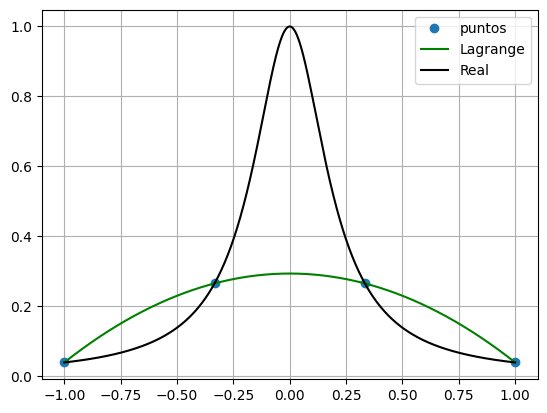

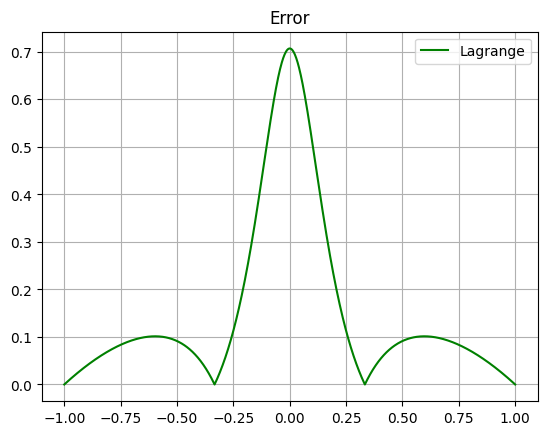

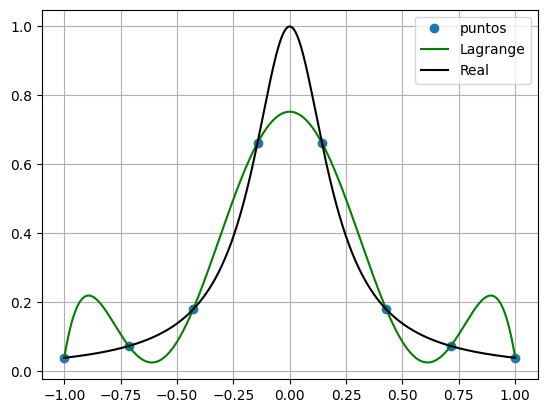

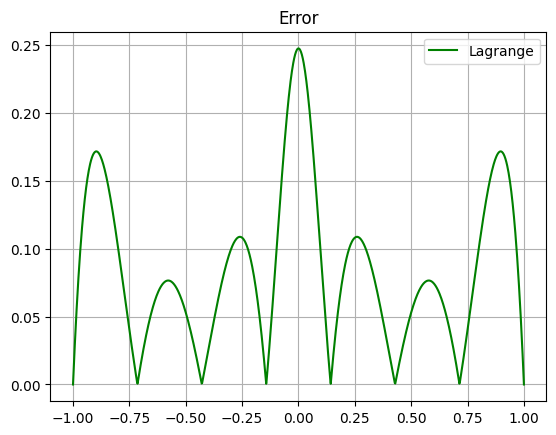

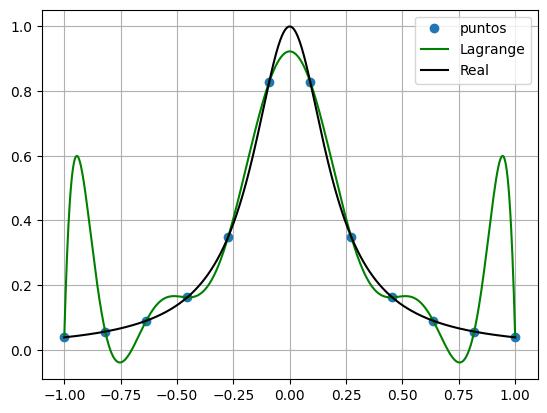

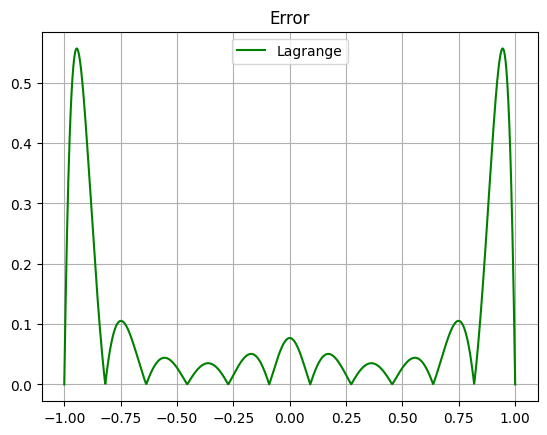

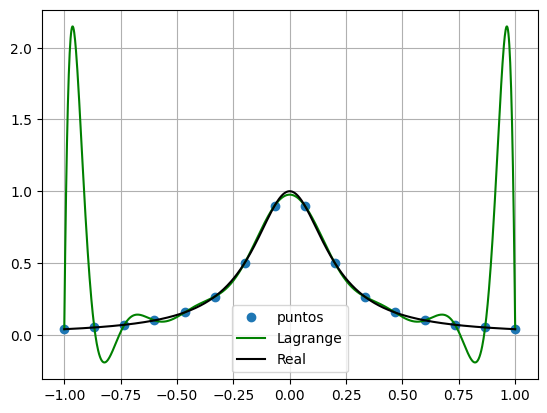

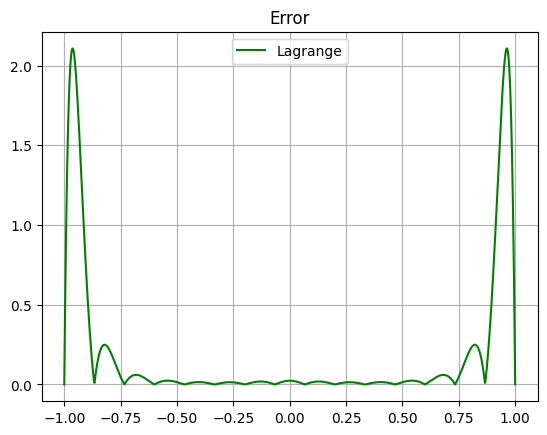

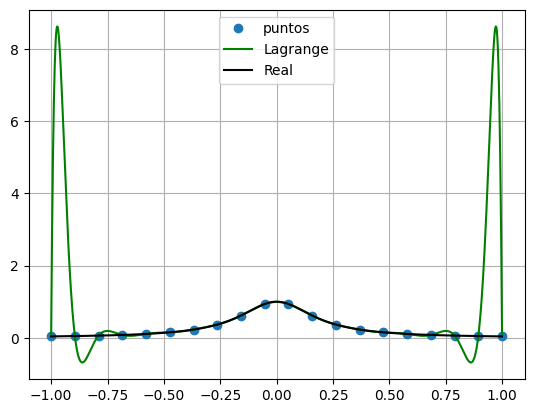

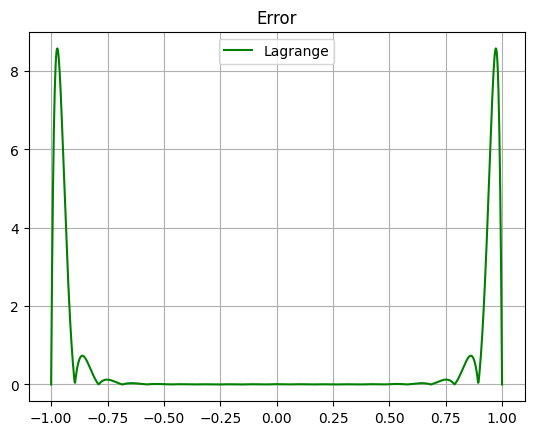

In [10]:
puntos = [4,8,12,16,20]
xreal=np.linspace(-1,1,1000)
yreal=f(xreal)

for i in range(len(puntos)):
  print("Número de puntos: ",puntos[i])
  xn=np.linspace(-1,1,puntos[i])
  yn=f(xn)

  ylag=np.zeros(len(xreal))

  for i in range(len(ylag)):
    ylag[i]=interpolacion_lagrange(xreal[i],xn,yn)

  plt.figure()
  plt.plot(xn,yn,'o',label=("puntos"))
  plt.plot(xreal,ylag,color='green',label='Lagrange')
  plt.plot(xreal,yreal,color='black',label='Real')
  #plt.xlim(0,0.01)
  plt.grid()
  plt.legend()


  errlag=abs((yreal-ylag))

  plt.figure()
  plt.title('Error')
  plt.plot(xreal,errlag,color='green',label='Lagrange')
  plt.legend()
  plt.grid()

##2. Tangente

Para la función $f(x) = \tan (x)$ definida entre $-\frac{\pi}{4}$ y $\frac{\pi}{4}$, usando $N=10$ (9 intervalos). Grafique la función original y aquella interpolada usando Lagrange.

Explore el comportamiento del algoritmo de interpolación lineal al variar el número de datos utilizados.

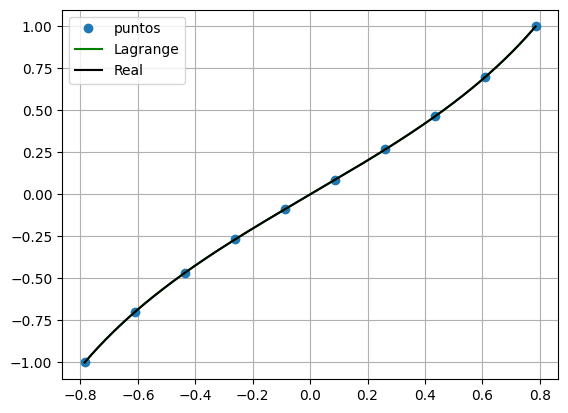

In [11]:
g = lambda x: np.tan(x)
xreal=np.linspace(-(np.pi)/4,(np.pi)/4,1000)
yreal=g(xreal)

xn=np.linspace(-(np.pi)/4,(np.pi)/4,10)
yn=g(xn)
ylag=np.zeros(len(xreal))

for i in range(len(ylag)):
  ylag[i]=interpolacion_lagrange(xreal[i],xn,yn)

plt.figure()
plt.plot(xn,yn,'o',label=("puntos"))
plt.plot(xreal,ylag,color='green',label='Lagrange')
plt.plot(xreal,yreal,color='black',label='Real')
plt.grid()
plt.legend()

In [13]:
def interpolacion_lineal(x_int,xn,yn):
  N=len(xn)

  for i in range(N-1):
    if xn[i]<=x_int<=xn[i+1]:
      y_int=(yn[i+1]-yn[i])/(xn[i+1]-xn[i])*(x_int-xn[i])+yn[i]
      break
  return y_int

Número de puntos:  4
Número de puntos:  8
Número de puntos:  12
Número de puntos:  16


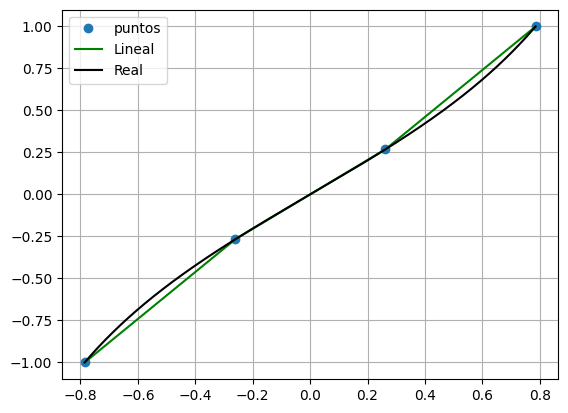

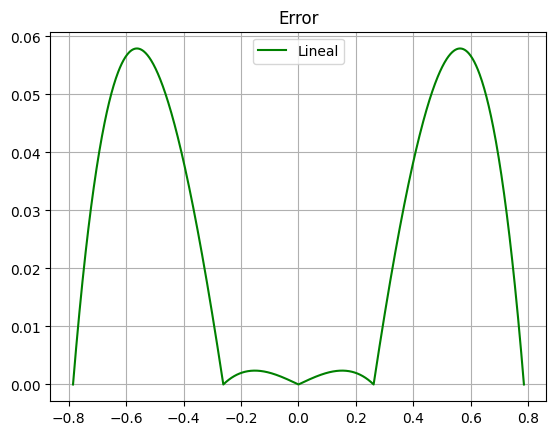

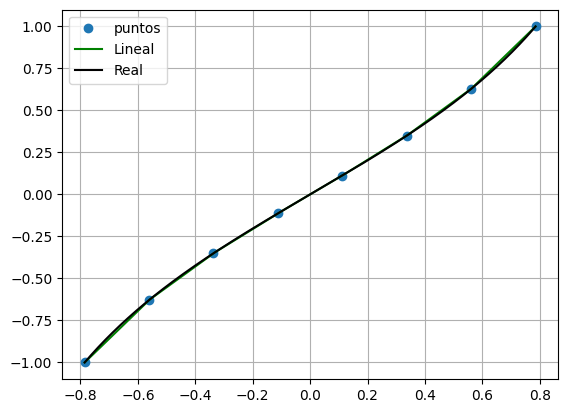

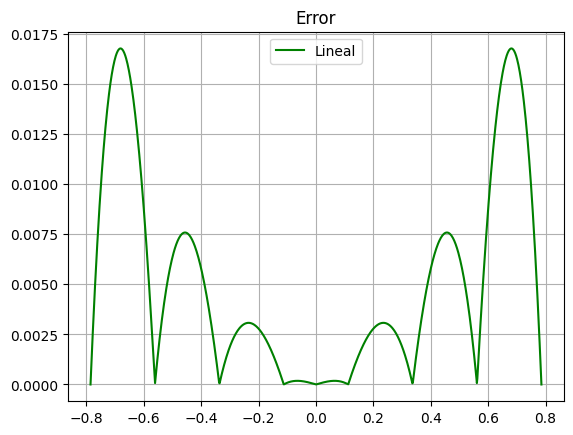

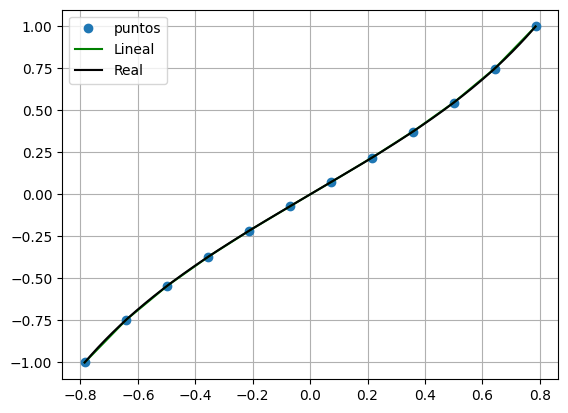

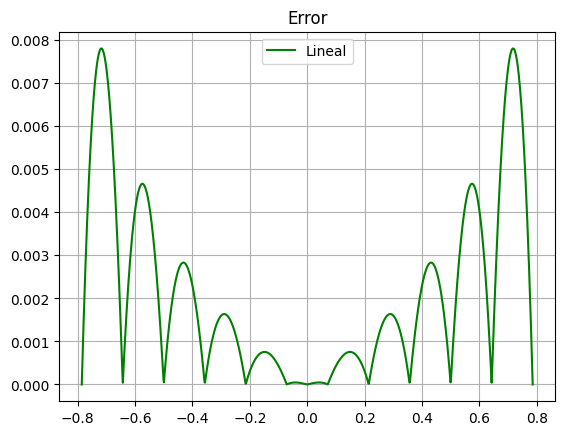

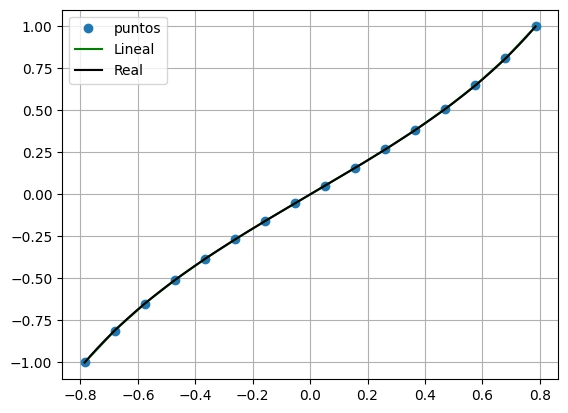

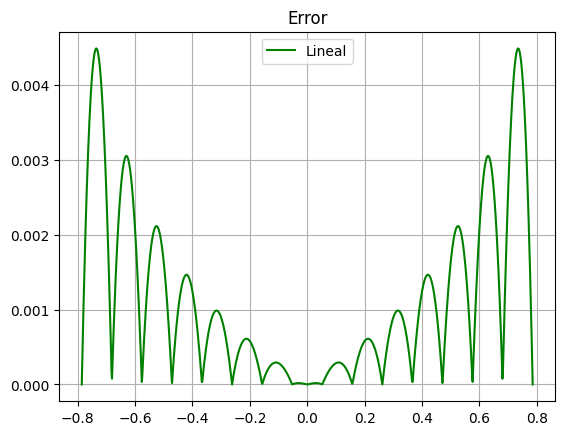

In [16]:
puntos=[4,8,12,16]
xreal=np.linspace(-(np.pi)/4,(np.pi)/4,1000)
yreal=g(xreal)

for i in range(len(puntos)):
  print("Número de puntos: ",puntos[i])
  xn= np.linspace(-(np.pi)/4,(np.pi)/4,puntos[i])
  yn=g(xn)
  ylin=np.zeros(len(xreal))

  for i in range(len(ylin)):
    ylin[i]=interpolacion_lineal(xreal[i],xn,yn)

  plt.figure()
  plt.plot(xn,yn,'o',label=("puntos"))
  plt.plot(xreal,ylin,color='green',label='Lineal')
  plt.plot(xreal,yreal,color='black',label='Real')
  plt.grid()
  plt.legend()


  errlin=abs((yreal-ylin))

  plt.figure()
  plt.title('Error')
  plt.plot(xreal,errlin,color='green',label='Lineal')
  plt.legend()
  plt.grid()



##3. Datos

Usando los siguientes datos:
```
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
```
a)  Cree un dataframe y utilizando la interpolación de Lagrange encuentre



valores intermedios, esto es,

```
new_x_range = np.arange(1.1, 2.1, 0.1)
```
b) Haga un gráfico donde muestre los valores originales y aquellos interpolados.

c) Utilizando un método diferente a Lagrange repita el procedimiento y explique si hay alguna diferencia


In [17]:
import pandas as pd
from scipy.interpolate import lagrange

x = np.array([1, 1.3, 1.6, 1.9, 2.2])
fx = np.array([0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623])

df = pd.DataFrame({'x': x, 'fx': fx})

interp_func = lagrange(df['x'], df['fx'])

x_intermediate = np.array([1.1, 1.4, 1.7, 2.0])
fx_intermediate = interp_func(x_intermediate)

print("Valores intermedios encontrados con la interpolación de Lagrange:")
for x_val, fx_val in zip(x_intermediate, fx_intermediate):
    print(f"x = {x_val}: fx = {fx_val}")

Valores intermedios encontrados con la interpolación de Lagrange:
x = 1.1: fx = 0.719645994238717
x = 1.4: fx = 0.5668463510288442
x = 1.7: fx = 0.39799261893008797
x = 2.0: fx = 0.2238753646091216


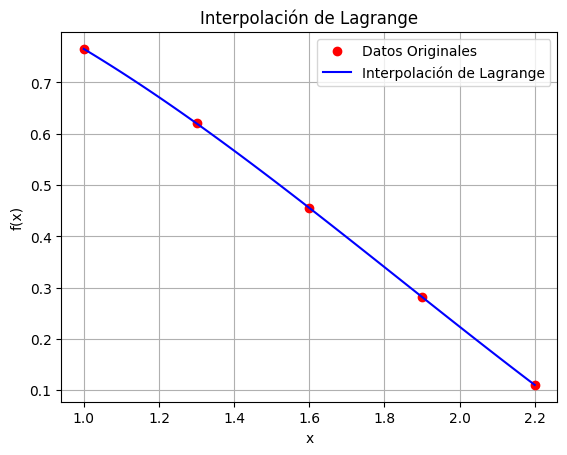

In [18]:
poly = lagrange(x, fx)
x_interpolated = np.linspace(1, 2.2, 100)
fx_interpolated = poly(x_interpolated)

plt.plot(x, fx, 'ro', label='Datos Originales')
plt.plot(x_interpolated, fx_interpolated, 'b-', label='Interpolación de Lagrange')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolación de Lagrange')
plt.legend()
plt.grid()
plt.show()

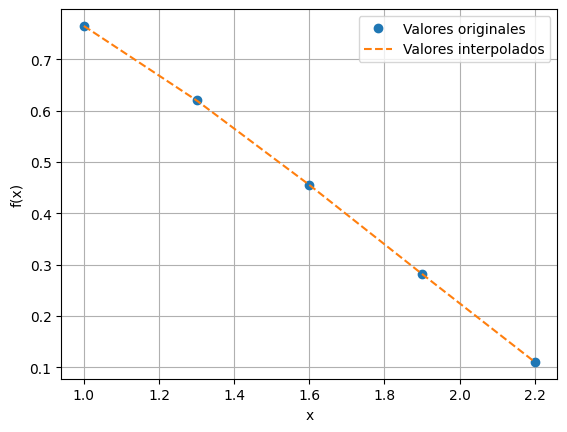

In [20]:
from scipy import interpolate
#Usando interpolación lineal:

x = np.array([1, 1.3, 1.6, 1.9, 2.2])
fx = np.array([0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623])

f = interpolate.interp1d(x, fx, kind='linear')
df = pd.DataFrame({'x': x, 'fx': fx})

x_interpol = np.linspace(x.min(), x.max(), 100)
fx_interpol = f(x_interpol)
df_interpol = pd.DataFrame({'x': x_interpol, 'fx': fx_interpol})


plt.plot(df['x'], df['fx'], 'o', label='Valores originales')
plt.plot(df_interpol['x'], df_interpol['fx'], '--', label='Valores interpolados')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

##4. Interpolación en imágenes


# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.